#Import dataset and explore basic info

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (replace with your file path or use a sample)
df = pd.read_csv("Titanic-Dataset.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (891, 12)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                            

#Handle missing values (mean/median)

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object').columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

#Encode categorical features

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode each object column
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for inverse transform if needed


Normalize/standardize numerical features

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])


Visualize outliers using boxplots and remove them

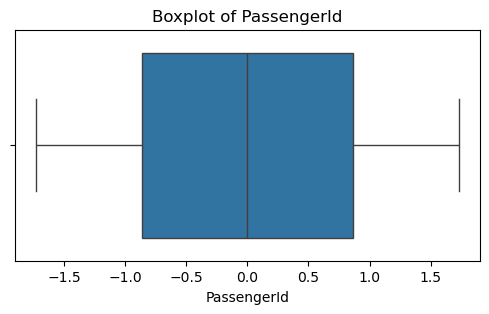

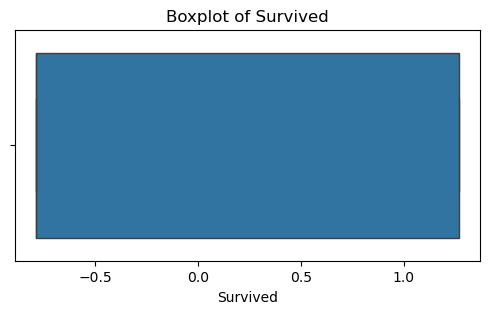

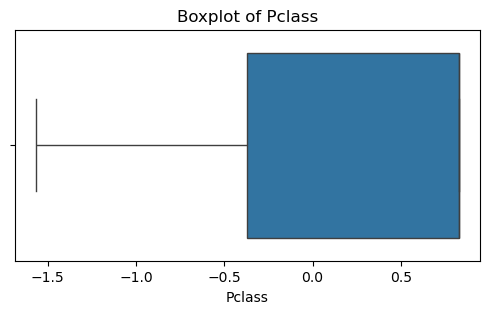

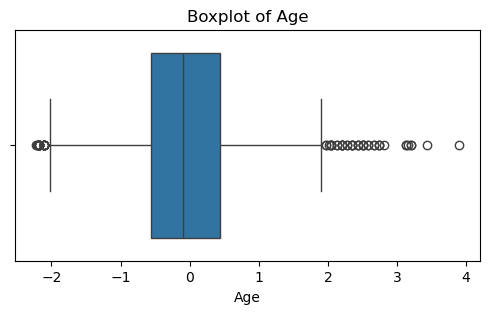

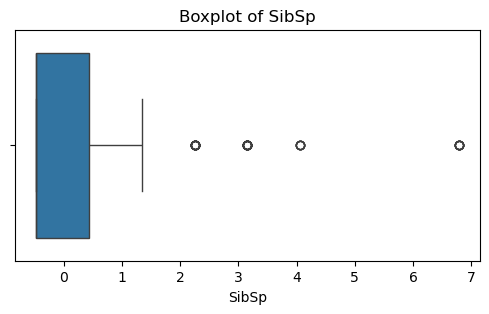

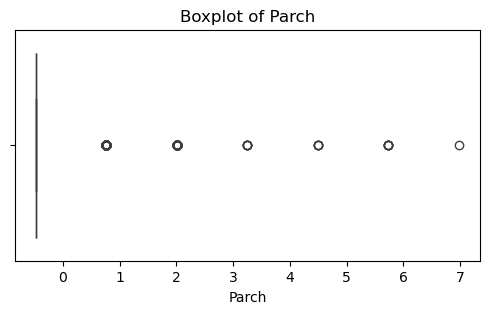

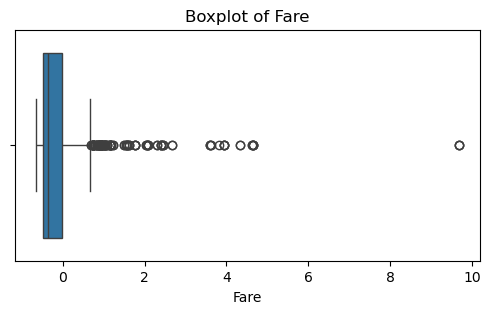

In [16]:
# Boxplot for each numerical column
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Remove outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


Final Check

In [17]:
print("Cleaned dataset shape:", df.shape)
print(df.describe())


Cleaned dataset shape: (561, 12)
       PassengerId    Survived      Pclass        Name         Sex  \
count   561.000000  561.000000  561.000000  561.000000  561.000000   
mean      0.011456   -0.199151    0.253538  455.550802    0.752228   
std       1.010508    0.930992    0.858249  253.690027    0.432104   
min      -1.730108   -0.789272   -1.566107    0.000000    0.000000   
25%      -0.874774   -0.789272   -0.369365  235.000000    1.000000   
50%       0.023327   -0.789272    0.827377  463.000000    1.000000   
75%       0.890325    1.266990    0.827377  664.000000    1.000000   
max       1.730108    1.266990    0.827377  890.000000    1.000000   

              Age       SibSp         Parch      Ticket        Fare  \
count  561.000000  561.000000  5.610000e+02  561.000000  561.000000   
mean    -0.014637   -0.301488 -4.736736e-01  342.652406   -0.372014   
std      0.650385    0.399553  4.444855e-16  188.846769    0.212633   
min     -1.872184   -0.474545 -4.736736e-01    2.000